<a href="https://colab.research.google.com/github/parthabathia/WineQualityPrediction/blob/main/WineQualityPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
wine_dataset = pd.read_csv('/content/wine.csv')

In [ ]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


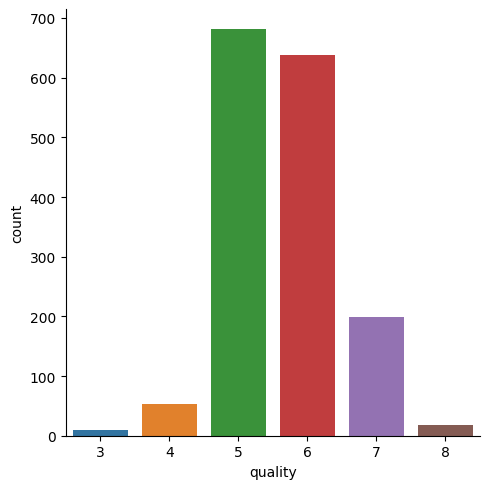

In [ ]:
sns.catplot(x='quality', data=wine_dataset, kind='count')

In [ ]:
correlation = wine_dataset.corr()

<Axes: >

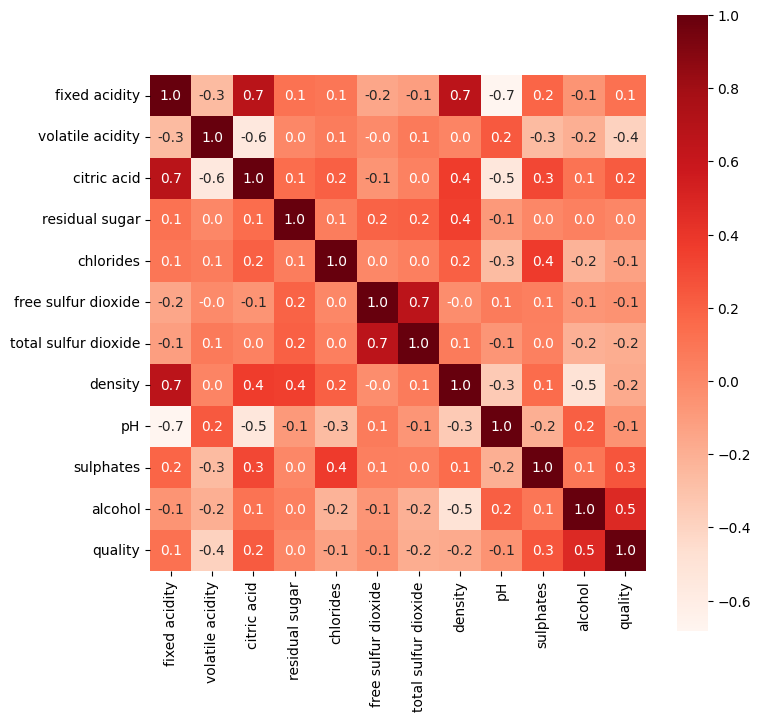

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, square=True, cbar=True, cmap='Reds', fmt='0.1f', annot=True, annot_kws={'size':10})

In [ ]:
X = wine_dataset.drop('quality', axis=1)
Y = wine_dataset['quality'].apply(lambda y_value:1 if y_value>=7 else 0)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
classifier = RandomForestClassifier()

In [ ]:
classifier.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
X_train_prediction = classifier.predict(X_train)

In [ ]:
X_train_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
X_train_accuracy

0.9992181391712275

In [ ]:
X_test_prediction = classifier.predict(X_test)
X_test_accuracy = accuracy_score(X_test_prediction, Y_test)
X_test_accuracy

0.928125

In [ ]:
X_test.shape

(320, 11)

In [ ]:
new_input = X_test[225:226:]
new_input_as_numpy = np.asarray(new_input)
y_input = Y_test[225:226:]

In [ ]:
new_input

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [ ]:
y_input

1597    0
Name: quality, dtype: int64

In [ ]:
new_input_prediction = classifier.predict(new_input_as_numpy)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
new_input_accuracy = accuracy_score(new_input_prediction, y_input)
new_input_accuracy

1.0